In [ ]:
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy.stats
import astropy.table
from astropy.table import join
import astropy.wcs
import astropy.cosmology
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import scipy.integrate as integrate
import scipy.optimize as optimize
from astropy.cosmology import FlatLambdaCDM

In [ ]:
morishita=ascii.read(r"/content/morishita_data.txt")
morishita

Subset,Name,RAdeg,DEdeg,UVmag,z,e_z,E_z,MUVmag,e_MUVmag,E_MUVmag,logMstar,e_logMstar,E_logMstar,logSFR,e_logSFR,E_logSFR,betaUV,e_betaUV,E_betaUV,logRe,e_logRe,E_logRe,l_OIIIHb,OIIIHb,e_OIIIHb,fgal,fcom
,,deg,deg,mag,,,,mag,mag,mag,dex(Msun),dex(Msun),dex(Msun),dex(Msun / yr),dex(Msun / yr),dex(Msun / yr),,,,dex(kpc),dex(kpc),dex(kpc),,dex(---),dex(---),,
str13,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,str1
F070W-dropout,J1235-2632,188.92749,4.8717985,26.7,6.0,0.2,0.1,-19.9,0.1,0.1,8.7,0.8,0.8,0.8,0.1,0.1,-2.7,0.1,0.1,-0.61,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-2875,188.94112,4.868082,27.0,6.4,0.2,0.1,-19.9,0.1,0.1,9.2,0.1,0.1,0.8,0.1,0.1,-2.4,0.1,0.2,-0.65,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-3021,188.93146,4.8745794,27.3,6.0,0.2,0.2,-19.3,0.1,0.1,7.9,0.1,0.1,0.6,0.1,0.1,-2.5,0.1,0.1,-0.56,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-3236,188.95332,4.8656316,27.2,6.8,0.2,0.2,-20.1,0.1,0.1,8.7,0.1,0.1,0.7,0.1,0.1,-2.2,0.1,0.1,-0.9,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-4628,188.96568,4.8757343,25.7,5.2,0.1,0.1,-21.0,0.1,0.1,9.9,0.1,0.1,1.6,0.1,0.1,-1.6,0.1,0.1,-0.27,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-4644,188.9286,4.8941765,27.0,6.3,0.2,0.2,-18.9,0.4,0.3,10.0,0.3,0.3,1.9,0.3,0.3,-0.6,0.2,0.5,-0.46,0.03,0.03,--,--,--,0,0
F070W-dropout,J1235-5704,188.94789,4.8993416,26.7,6.6,0.1,0.1,-21.5,0.1,0.1,8.8,0.5,0.5,0.9,0.1,0.1,-2.5,0.2,0.2,-0.84,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-7600,188.94092,4.915246,26.5,5.7,0.2,0.2,-20.1,0.1,0.1,9.4,0.1,0.1,0.9,0.1,0.1,-2.4,0.1,0.1,0.08,0.02,0.02,--,--,--,0,0


In [ ]:
y=morishita['logSFR']
x=morishita['logMstar']
co_low=morishita['e_logSFR']
co_high=morishita['E_logSFR']
co=((co_low)+(co_high))/2
small=morishita[morishita['MUVmag']>(-19)]
big=morishita[morishita['MUVmag']<=(-19)]
small

Subset,Name,RAdeg,DEdeg,UVmag,z,e_z,E_z,MUVmag,e_MUVmag,E_MUVmag,logMstar,e_logMstar,E_logMstar,logSFR,e_logSFR,E_logSFR,betaUV,e_betaUV,E_betaUV,logRe,e_logRe,E_logRe,l_OIIIHb,OIIIHb,e_OIIIHb,fgal,fcom
,,deg,deg,mag,,,,mag,mag,mag,dex(Msun),dex(Msun),dex(Msun),dex(Msun / yr),dex(Msun / yr),dex(Msun / yr),,,,dex(kpc),dex(kpc),dex(kpc),,dex(---),dex(---),,
str13,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,str1
F070W-dropout,J1235-4644,188.9286,4.8941765,27.0,6.3,0.2,0.2,-18.9,0.4,0.3,10.0,0.3,0.3,1.9,0.3,0.3,-0.6,0.2,0.5,-0.46,0.03,0.03,--,--,--,0,0
F070W-dropout,J1235-14339,188.97955,4.9459105,27.3,6.0,0.2,0.3,-18.7,0.1,0.1,8.1,0.2,0.2,0.6,0.1,0.1,-2.4,0.1,0.1,-0.07,0.1,0.1,--,--,--,0,0
F070W-dropout,J1235-20019,188.99167,4.9734235,27.4,6.8,0.2,0.1,-18.8,0.2,0.1,9.5,0.1,0.1,0.7,0.2,0.2,-1.9,0.2,0.2,-0.59,0.02,0.02,--,--,--,0,0
F070W-dropout,A2744-6031,3.5769939,-30.415525,27.1,5.13,--,--,-18.8,0.1,0.1,8.7,0.1,0.1,0.5,0.1,0.1,-1.9,0.1,0.1,0.05,0.06,0.06,--,--,--,1,--
F070W-dropout,A2744-7284,3.5879247,-30.411587,29.4,5.28,--,--,-17.9,0.1,0.1,7.8,0.2,0.2,-0.2,0.2,0.2,-2.0,0.2,0.3,-0.93,0.6,0.6,--,0.5,0.1,0,0
F070W-dropout,A2744-7728,3.6006,-30.410273,29.9,6.38,--,--,-16.9,0.1,0.1,7.1,0.3,0.3,-0.4,0.1,0.1,-2.6,0.2,0.2,-1.39,0.22,0.22,--,0.5,0.3,0,1
F070W-dropout,A2744-7965,3.5965643,-30.40897,29.2,5.28,--,--,-16.5,0.1,0.1,8.0,0.2,0.2,-0.1,0.3,0.3,-1.9,0.3,0.2,-0.81,0.5,0.5,--,--,--,0,0
F070W-dropout,A2744-9421,3.6000569,-30.404362,28.8,5.28,--,--,-17.6,0.1,0.1,7.8,0.1,0.1,-0.1,0.1,0.1,-2.2,0.1,0.1,-0.66,0.1,0.1,--,--,--,0,0


In [ ]:
big_data = astropy.table.Table({'Name': big['Name'],
                                  'UVmag': big['UVmag'],
                                  'z': big['z'],
                                  'e_z':((big['e_z']+big['E_z'])/2),
                                  'MUVmag':big['MUVmag'],
                                  'e_MUVmag':((big['e_MUVmag']+big['E_MUVmag'])/2),
                                  'logMstar':big['logMstar'],
                                  'e_logMstar':((big['e_logMstar']+big['E_logMstar'])/2),
                                  'logSFR':big['logSFR'],
                                  'betaUV':big['betaUV'],
                                  'e_logSFR':((big['e_logSFR']+big['E_logSFR'])/2)})
SFR_dash=(-24)-((0.4)*(big_data['UVmag']+48.6-4.43-(1.99*big_data['betaUV'])))+np.log10(1.4)
big_data.add_column(SFR_dash,name='logSFR_dash')
Mstar_dash=big_data['logMstar']-(big_data['logSFR']-big_data['logSFR_dash'])
big_data.add_column(Mstar_dash,name='logMStar_dash')

big_data

Name,UVmag,z,e_z,MUVmag,e_MUVmag,logMstar,e_logMstar,logSFR,betaUV,e_logSFR,logSFR_dash,logMStar_dash
,mag,,,mag,mag,dex(Msun),dex(Msun),dex(Msun / yr),,dex(Msun / yr),mag,dex(Msun)
str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1235-2632,26.7,6.0,0.15000000000000002,-19.9,0.1,8.7,0.8,0.8,-2.7,0.1,-54.35107196432177,-46.45107196432177
J1235-2875,27.0,6.4,0.15000000000000002,-19.9,0.1,9.2,0.1,0.8,-2.4,0.1,-54.23227196432176,-45.83227196432176
J1235-3021,27.3,6.0,0.2,-19.3,0.1,7.9,0.1,0.6,-2.5,0.1,-54.431871964321765,-47.13187196432177
J1235-3236,27.2,6.8,0.2,-20.1,0.1,8.7,0.1,0.7,-2.2,0.1,-54.15307196432176,-46.15307196432177
J1235-4628,25.7,5.2,0.1,-21.0,0.1,9.9,0.1,1.6,-1.6,0.1,-53.075471964321764,-44.77547196432177
J1235-5704,26.7,6.6,0.1,-21.5,0.1,8.8,0.5,0.9,-2.5,0.1,-54.19187196432176,-46.29187196432176
J1235-7600,26.5,5.7,0.2,-20.1,0.1,9.4,0.1,0.9,-2.4,0.1,-54.03227196432176,-45.53227196432176
J1235-8122,27.6,5.2,0.1,-19.0,0.1,8.6,0.1,0.4,-2.2,0.1,-54.31307196432177,-46.11307196432177


In [ ]:
#function for fitting the values to a straight line of for y=mx+c
def linear_fit(x,y,co):
    A_transpose=np.matrix(np.ones(len(x)))
    A_transpose=np.vstack([A_transpose,x])
    A=A_transpose.transpose()
    Y=np.matrix(y)
    covar=np.diag(co*co)
    Y_transpose=Y.transpose()
    Cinv=np.linalg.inv(covar)
    B=np.matmul(A_transpose,Cinv)
    D=np.matmul(B,A)
    E=np.linalg.inv(D)
    F=np.matmul(B,Y_transpose)
    const=np.matmul(E,F)

    return(const,E)


<ipython-input-26-15e0adf51f2c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b=float(big_p[0])
<ipython-input-26-15e0adf51f2c>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma=float(big_p[1])


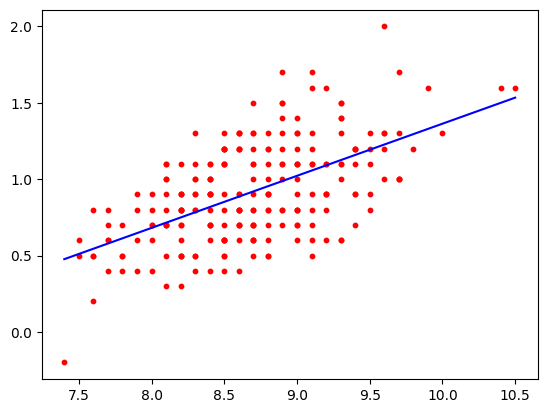

gamma =  0.34113505048933895 ± 0.012186693500837889
b =  -2.0479556587036614 ± 0.10583095923662413
delta =  0.2472351443732927


In [ ]:
#fitting of the galaxies with z>5 and MUV>-19
big_p,err_big_p=linear_fit(big_data['logMstar'],big_data['logSFR'],big_data['e_logSFR'])
plt.scatter(big_data['logMstar'],big_data['logSFR'],color='red',s=10)
#plt.errorbar(x,y,co_low,fmt='o',color='r')

b=float(big_p[0])
gamma=float(big_p[1])


k = np.linspace(min(big_data['logMstar']),max(big_data['logMstar']),100)
l =(k*gamma)+b


plt.plot(k, l, color='blue')



plt.show()
residual=big_data['logSFR']-((gamma*big_data['logMstar'])+b)
delta_sqrd=np.mean((residual**2)-(big_data['e_logSFR']**2))
print("gamma = ", gamma,'±', np.sqrt(err_big_p[1, 1]))
print("b = ", b ,'±', np.sqrt(err_big_p[0, 0]))
delta=np.sqrt(delta_sqrd)
print("delta = ", delta)


In [ ]:
#uncomment the lines to install modules
'''
!pip install emcee
!pip install corner
!pip install multiprocessing
'''

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 3.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import emcee
import corner

import multiprocessing

In [ ]:
# Function for Luminosity Distance in m in Flat LCDM

def Dl_LCDM(z, Omega_m):
    c = 299792.458
    H0 = 70
    Ez_inv = lambda zp: 1.0 / np.sqrt(Omega_m * (1 + zp) ** 3 + (1 - Omega_m))
    integral, _ = integrate.quad(Ez_inv, 0, z)
    return (c / H0) * (1 + z) * integral*3.086*(10**22)


"\nz_obs = big_data['z']\nDL_obs = Dl_LCDM(z_obs, 0.3)\nbig_data['logSFR']-np.log10(4*np.pi*DL_obs**2)\n"

In [ ]:
def Phi(logM_star_prime, DL, beta, gamma):

    DL = np.array(DL)  # Convert to numpy array if not already
    return beta + (gamma * logM_star_prime) + ((- 1) * (2 * np.log10(DL) + np.log10(4*np.pi)))


In [ ]:
# Log-likelihood function from Equation (5)
def log_likelihood(theta, logSFR_prime_obs, logM_star_prime_obs, z_obs, DL_obs, logSFR_err, logM_star_err):
    beta, gamma, delta, Omega_m = theta


    if not (0.2 < Omega_m < 0.4):
        return -np.inf


    # Parallelized computation of Dl values
    Dl_vals = np.array([Dl_LCDM(z, Omega_m) for z in z_obs])
    logSFR_model = Phi(logM_star_prime_obs, Dl_vals, beta, gamma)


    s2 = logSFR_err**2 + (gamma**2) * logM_star_err**2 + delta**2


    logL = -0.5 * np.sum((abs(logSFR_prime_obs - logSFR_model) ** 2 / s2) + np.log(2 * np.pi * s2))

    return logL

In [ ]:
# Define log-prior function
def log_prior(theta):
    beta, gamma, delta, Omega_m = theta


    if -3 < beta < 0 and 0 < gamma <  2 and 0 < delta < 2 and 0.2 < Omega_m < 0.5:
        return 0.0  # Flat priors
    return -np.inf


In [ ]:
def log_posterior(theta, logSFR_prime_obs, logM_star_prime_obs, z_obs, DL_obs, logSFR_err, logM_star_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, logSFR_prime_obs, logM_star_prime_obs, z_obs, DL_obs, logSFR_err, logM_star_err)


2
Running MCMC...


  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [29:24<00:00,  2.83it/s]


Best-fit parameters:
β = -1.744, γ = 0.398, δ = 0.311, Ωm = 0.327


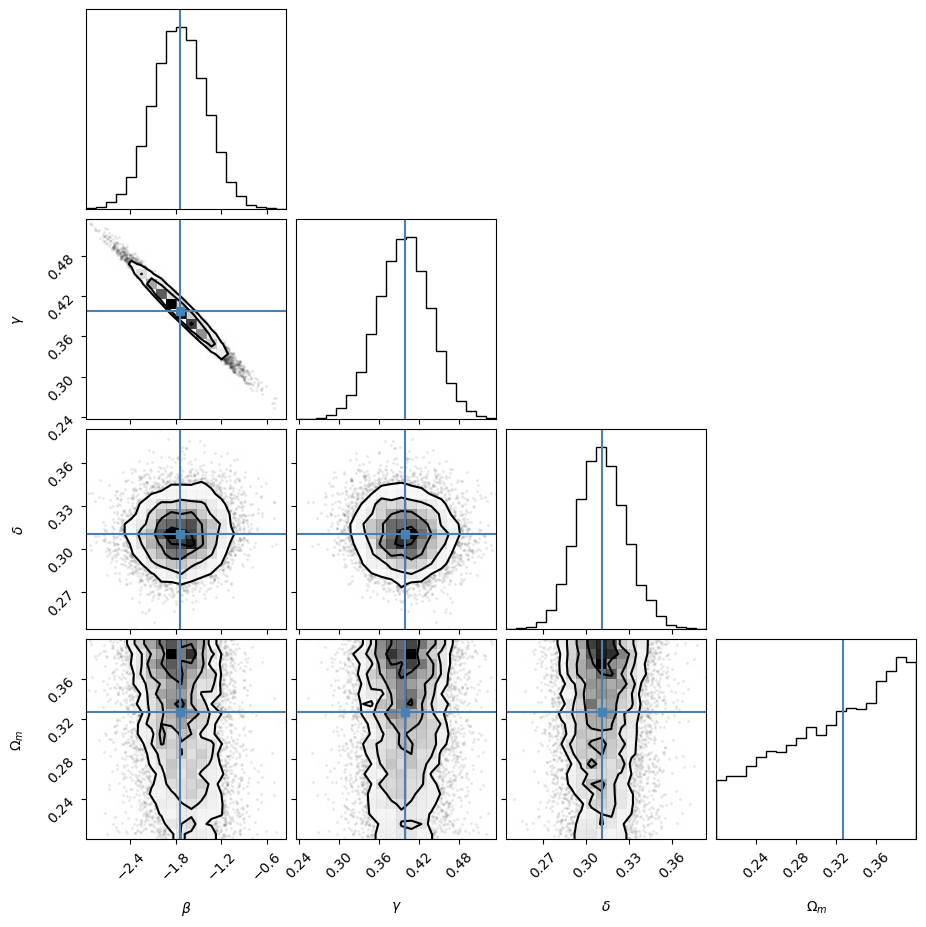

Autocorrelation time: [54.64741858 54.42416156 49.13637591 59.83749834]
Effective Sample Size: 146.75839076702002


In [ ]:

c = 299792.458
H0 = 70
log4pi = np.log10(4 * np.pi)

z_obs = big_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.3) for z in z_obs])
logSFR_prime_obs = big_data['logSFR_dash']
logM_star_prime_obs = big_data['logMstar']
logSFR_err = big_data['e_logSFR']
logM_star_err =  big_data['e_logMstar']


ndim = 4
nwalkers = 20
nsteps = 5000



p0 = np.random.normal(loc=[-2.0479556587036614,  0.34113505048933895, 0.2472351443732927, 0.3], scale=[0.1, 0.05, 0.05, 0.05], size=(nwalkers, ndim))
n_threads = multiprocessing.cpu_count()
print(n_threads)
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior,
    args=(logSFR_prime_obs, logM_star_prime_obs, z_obs, DL_obs, logSFR_err, logM_star_err)
)

print("Running MCMC...")
sampler.run_mcmc(p0, nsteps, progress=True)
samples = sampler.get_chain(discard=1000, thin=10, flat=True)

best_fit_params = np.median(samples, axis=0)
beta_best, gamma_best, delta_best, Omega_m_best = best_fit_params

print(f"Best-fit parameters:")
print(f"β = {beta_best:.3f}, γ = {gamma_best:.3f}, δ = {delta_best:.3f}, Ωm = {Omega_m_best:.3f}")

# Corner plot of the posterior distribution
fig = corner.corner(samples, labels=[r"$\beta$", r"$\gamma$", r"$\delta$", r"$\Omega_m$"], truths=best_fit_params)
plt.show()
try:
    tau = sampler.get_autocorr_time()
    print(f"Autocorrelation time: {tau}")
    print(f"Effective Sample Size: {len(samples) / np.mean(tau)}")
except:
    print("Autocorrelation time estimation failed. The chain may not have converged.")


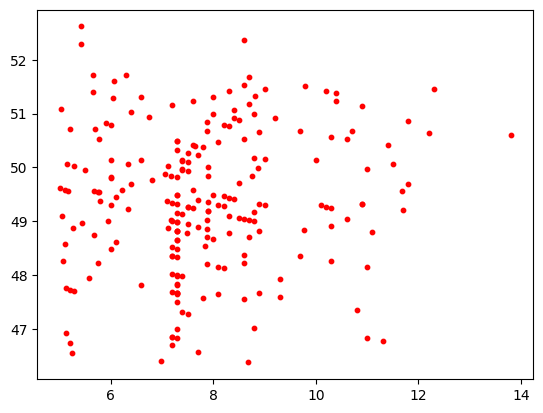

In [ ]:
z_obs = big_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.327) for z in z_obs])
f=big_data['logSFR_dash']-(0.398*(big_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.744-(0.398-1)*np.log10(4*np.pi)
#f=small_data['logSFR_dash']-(0.189*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+0.419-(0.180-1)*np.log10(4*np.pi)
f=f-((0.398-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/(0.398-1))+25
plt.scatter(z_obs,dm,color='red',s=10)

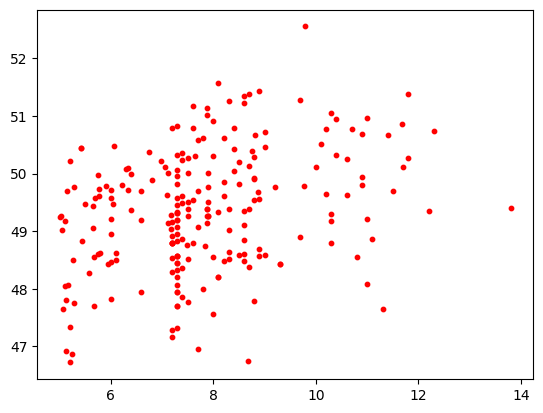

In [ ]:
z_obs = big_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.324) for z in z_obs])
f=big_data['logSFR_dash']-( 0.332*(big_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.967-(0.332-1)*np.log10(4*np.pi)
f=big_data['logSFR']-np.log10(4*np.pi*DL_obs**2)-(0.332*(big_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.967-(0.332-1)*np.log10(4*np.pi)
f=f-(( 0.332-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/( 0.332-1))+25
plt.scatter(z_obs,dm,color='red',s=10)